<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/Assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings('ignore')
%matplotlib inline

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics Personal Assignment</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# IMPORTANT

Question 1: Before starting this assignment, please indicate whether this course is worth 4.5 or 6 credits to you. Please answer truthfully, as checks will be made afterwards. This question is only intended to facilitate the calculation of final points.

> 6

# Part 1: Climate Analytics - Rice vs Wheat in a Changing World

## Context

You work as a junior data analyst at SerriFleur, an international NGO focused on sustainable agriculture in the face of climate change. Your team is investigating how climate conditions and farming practices affect the yields of rice and wheat — two of the most critical staple crops globally.

You’ve just received a massive dataset from the research division: "Hydroponix.csv". Your task is to extract insights, build models, and tell a compelling story from the data. You can find the dataset here: https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv

Columns Overview:

* `Year` : Year of the observation.

* `Country` : Country where the data was collected.

* `Region` : Specific region within the country.

* `Crop_Type` : Type of agricultural crop observed.

* `Average_Temperature` : Annual average temperature in degrees Celsius.

* `Total_Precipitation` : Total annual precipitation in millimeters.

* `CO2_Emissions` : CO₂ emissions in million tons.

* `Crop_Yield` : Agricultural yield in tons per hectare.

* `Extreme_Weather_Events` : Number of recorded extreme weather events.

* `Irrigation_Access` : Percentage of cultivated land with access to irrigation.

* `Pesticide_Use` : Pesticide use in kilograms per hectare.

* `Fertilizer_Use` : Fertilizer use in kilograms per hectare.

* `Soil_Health_Index` : Soil quality index (out of 100).

* `Economic_Impact` : Economic impact in million USD.

In [272]:
data_climate = url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv"
data_climate = pd.read_csv(url)
data_climate.head(10)

,Year,Country,Region,Crop_Type,Average_Temperature,Total_Precipitation,CO2_Emissions,Crop_Yield,Irrigation_Access,Pesticide_Use,Fertilizer_Use,Soil_Health_Index,Economic_Impact
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,14.54,10.08,14.78,83.25,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,11.05,33.06,23.25,54.02,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,84.42,27.41,65.53,67.78,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,94.06,14.38,87.58,91.39,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,95.75,44.35,88.08,49.61,401.72
5,2019,USA,Midwest,Coffee,17.19,975.13,10.73,2.180,52.45,26.06,71.56,97.32,353.16
6,1997,Argentina,Northeast,Fruits,23.46,1816.41,27.70,1.611,20.22,0.56,28.72,79.09,480.61
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,66.53,13.44,40.50,63.16,1367.97
8,2012,India,Punjab,Wheat,32.08,1233.10,6.10,2.990,45.87,10.09,32.54,42.31,761.89
9,2018,Nigeria,North West,Barley,21.23,475.32,25.74,0.765,25.74,44.38,72.92,84.21,167.21


## Exercise 1: Data Cleaning & Preprocessing



The dataset you’ve received contains data from multiple countries, various crops, and inconsistent formatting. Your first job is to narrow the scope of your study and prepare a clean dataset that’s ready for analysis.

Your mission:

*   Filter the dataset to focus only on rice and wheat
*   Drop the regional identifiers column
*   Group the data by Country, Year and Crop_type but don't put them as index (*Hint: specific parameter of `groupby`*) and calculate the mean of each column
*   Change the type of the columns `Country` and `Crop_type`


In [273]:
# Question 2: Find the list of crop types produced by SerriFleur

crop_types = data_climate["Crop_Type"].unique()
print("Crop types produced by SerriFleur:", crop_types)

Crop types produced by SerriFleur: ['Corn' 'Wheat' 'Coffee' 'Sugarcane' 'Fruits' 'Rice' 'Barley' 'Vegetables'
 'Soybeans' 'Cotton']


In [274]:
# Data cleaning

# Filter dataset for Rice and Wheat
data_climate = data_climate[(data_climate["Crop_Type"] == "Rice") | (data_climate["Crop_Type"] == "Wheat")]
# Drop the regional identifiers column
data_climate.drop(columns=["Region"], inplace=True)
# Group by Country, Year, and Crop_Type without setting them as index
data_climate = data_climate.groupby(["Country", "Year", "Crop_Type"], as_index=False).mean()
# Change the type of the columns Country and Crop_type
data_climate["Country"] = data_climate["Country"].astype("category")
data_climate["Crop_Type"] = data_climate["Crop_Type"].astype("category")

print(data_climate.head())


     Country  Year Crop_Type  Average_Temperature  Total_Precipitation  \
0  Argentina  1990      Rice              25.2500          1540.486667   
1  Argentina  1990     Wheat              10.7550           867.305000   
2  Argentina  1991      Rice              14.3175           761.692500   
3  Argentina  1992      Rice              14.8650          1190.220000   
4  Argentina  1992     Wheat              27.5200          1304.713333   

   CO2_Emissions  Crop_Yield  Irrigation_Access  Pesticide_Use  \
0      14.126667    2.686333          58.413333      42.223333   
1      18.350000    2.686500          39.830000      16.875000   
2      15.115000    2.538000          42.930000      29.302500   
3      19.710000    2.794500          57.740000      33.495000   
4      20.786667    1.838667          78.210000      30.903333   

   Fertilizer_Use  Soil_Health_Index  Economic_Impact  
0       18.710000          72.513333       618.393333  
1       75.195000          75.215000       650

In [275]:
# Question 3: Find the total number of countries where Serrifleur operates in

num_countries = data_climate["Country"].nunique()
print(f"SerriFleur operates in {num_countries} countries.")

SerriFleur operates in 10 countries.


**Note on Climate Variables per Crop**:

> You may notice that climate-related variables such as average temperature and total precipitation vary across different crops, even for the same country and year. This is because each crop is typically grown in different regions within a country, depending on factors like soil conditions, irrigation availability, and climatic suitability. For example, wheat might be cultivated in cooler northern regions while corn is grown in warmer southern areas. Therefore, the recorded climate data reflects regional conditions specific to where each crop is grown, rather than national averages. This is an important consideration when interpreting the results of this analysis.

## Exercise 2: Exploratory Data Analysis

Before diving into modeling, your supervisor wants a clear picture of the current state of affairs in South America. You’re tasked with visualizing total precipitation level, economic impacts and soil health.

Your mission:


*   Plot total precipitation evolution over the years for each crop in Argentina
*   Create a pie chart that shows the percentage share of the total economic impact for each crop in Brazil
*   Create boxplots comparing soil health across crops and all the countries


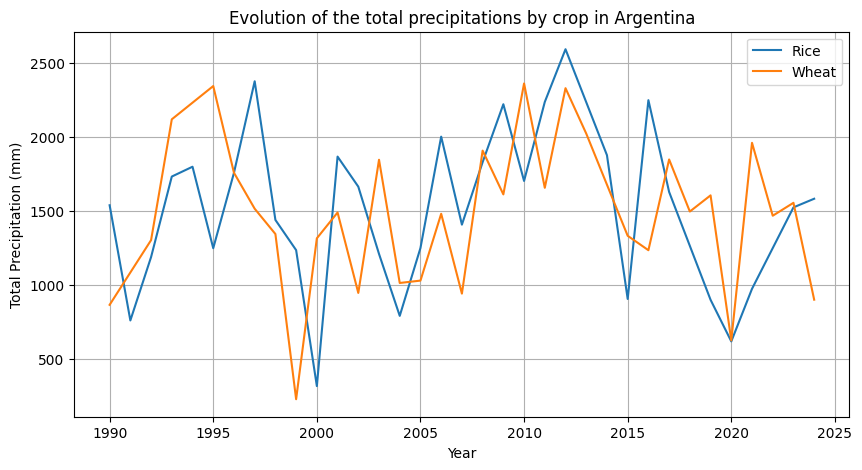

In [276]:
# Question 4: Create the graph of the total precipitation evolution over the years for each crop in Argentina

# Filter the data to keep only Argentina
data_argentina = data_climate[data_climate["Country"] == "Argentina"]

# Plot the evolution of total precipitation by crop
plt.figure(figsize=(10, 5))

for crop in data_argentina["Crop_Type"].unique():
    subset = data_argentina[data_argentina["Crop_Type"] == crop]
    plt.plot(subset["Year"], subset["Total_Precipitation"], label=crop)

plt.xlabel("Year")
plt.ylabel("Total Precipitation (mm)")
plt.title("Evolution of the total precipitations by crop in Argentina")
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Proportion of the totale economic impact for each crop in Brazil')

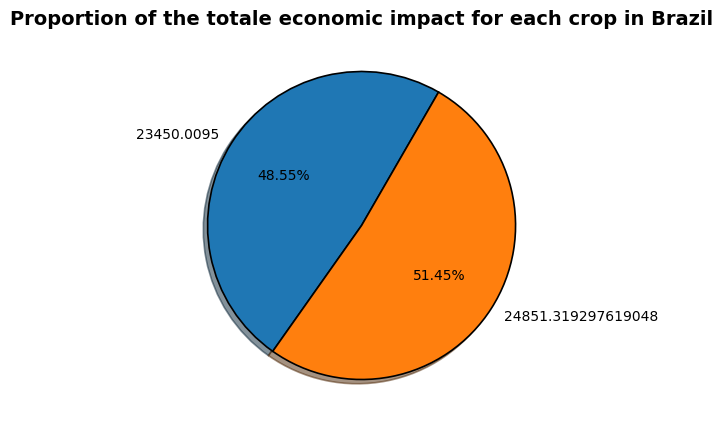

In [277]:
# Question 5: Create the pie chart that shows the percentage share of the totale economic impact for each crop in Brazil

# Filter the data to keep only Argentina
data_brazil = data_climate[data_climate["Country"] == "Brazil"]
# Group the data by crop type and calculate the total economic impact
data_pie = data_brazil.groupby("Crop_Type")["Economic_Impact"].sum()
labels= data_pie.unique() #get the unique values that can take this column of our dataframe
labels= labels.tolist() # and make it a list in order to label our further piechart
fig=plt.figure(figsize=(9,5))

plt.pie(data_pie, labels=labels, autopct="%2.2f%%", startangle= 60, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
plt.title("Proportion of the totale economic impact for each crop in Brazil", size=16, fontsize=14, fontweight='bold')

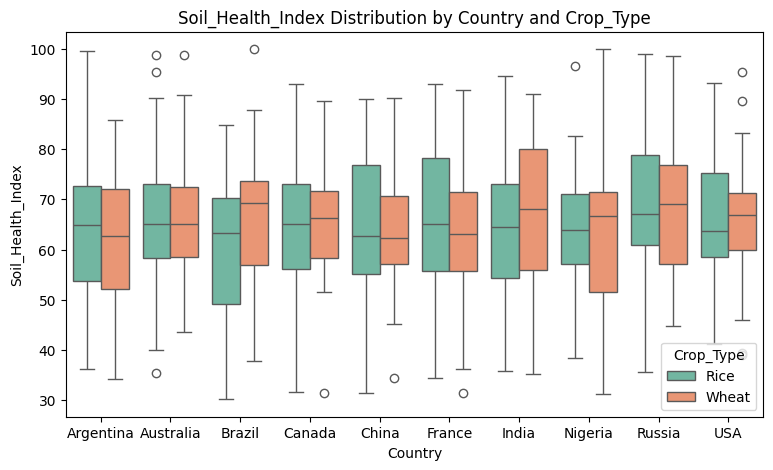

In [278]:
# Question 6: Create the boxplots that compare the soil health index across crops and all the countries

fig, ax = plt.subplots(figsize=(9, 5))
graph = sns.boxplot(y='Soil_Health_Index', hue='Crop_Type', x='Country', data=data_climate, ax=ax, palette='Set2')
graph.set_xlabel('Country')
graph.set_ylabel('Soil_Health_Index')
ax.set_title("Soil_Health_Index Distribution by Country and Crop_Type")
plt.show();


## Exercise 3: Clustering

SerriFleur aims to classify countries based on their farming practices in order to provide region-specific recommendations. You propose using unsupervised learning to identify distinct fertilizer usage profiles.

Your mission:



*   For each crop type, use agglomerative clustering on fertilizer usage with 4 clusters, euclidian distance metric and ward linkage
*   Analyze whether wheat and rice follow similar cluster pattern
*   Plot the dendrogram representation of fertilizer usage, for each crop type, with euclidian distance metric and average linkage


In [279]:
# Agglomerative Clustering for Wheat
# Question 7: Find the number of values in each clustering label

# Filter dataset to focus on fertilizer usage for Wheat
data_filtered_w = data_climate[data_climate["Crop_Type"]=="Wheat"]
# Select only the relevant column Fertilizer_Use
X_2_w = data_filtered_w[['Fertilizer_Use']]
clustering = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
labels_w = clustering.fit_predict(X_2_w)
# Count occurrences of each cluster label
cluster_counts = pd.Series(labels_w).value_counts().sort_index()
# Display cluster counts
print("Number of values in each clustering label:\n", cluster_counts)

Number of values in each clustering label:
 0    129
1    126
2     34
3     44
Name: count, dtype: int64


In [280]:
# Agglomerative Clustering for Rice
# Question 7: Find the number of values in each clustering label

data_filtered_r = data_climate[data_climate["Crop_Type"] == "Rice"]
X_2_r = data_filtered_r[['Fertilizer_Use']]
# Perform Agglomerative Clustering
#clustering = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
labels_r = clustering.fit_predict(X_2_r)
# Count occurrences of each cluster label
cluster_counts = pd.Series(labels_r).value_counts().sort_index()
# Display cluster counts
print("Number of values in each clustering label:\n", cluster_counts)

Number of values in each clustering label:
 0    137
1     50
2     60
3     85
Name: count, dtype: int64


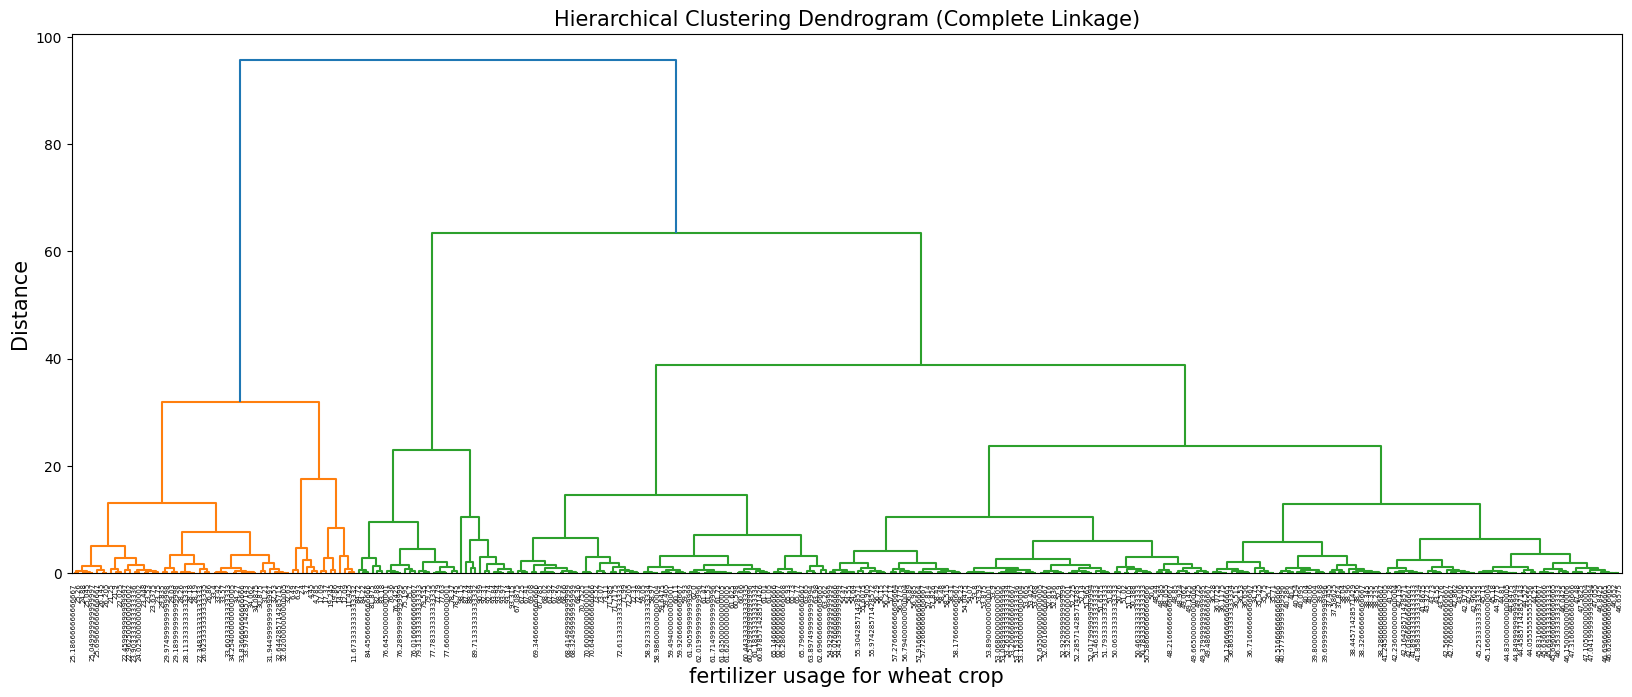

In [281]:
# Question 8: Hierarchical Clustering for Wheat
# Don't forget to reshape the values with numpy

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontsize=15)
plt.xlabel('fertilizer usage for wheat crop', fontsize=15)
plt.ylabel('Distance', fontsize=15)

# To make the plot easier to read, let's only keep the unique spending score values.
X = np.reshape(np.unique(X_2_w), (-1, 1))

# Provide the linkage method we want and the chosen distance metric.
W_w = linkage(X, method='complete', metric='euclidean')
dendrogram(W_w, labels=X.reshape(-1)) # compute the dendogram according the linkage

plt.show()

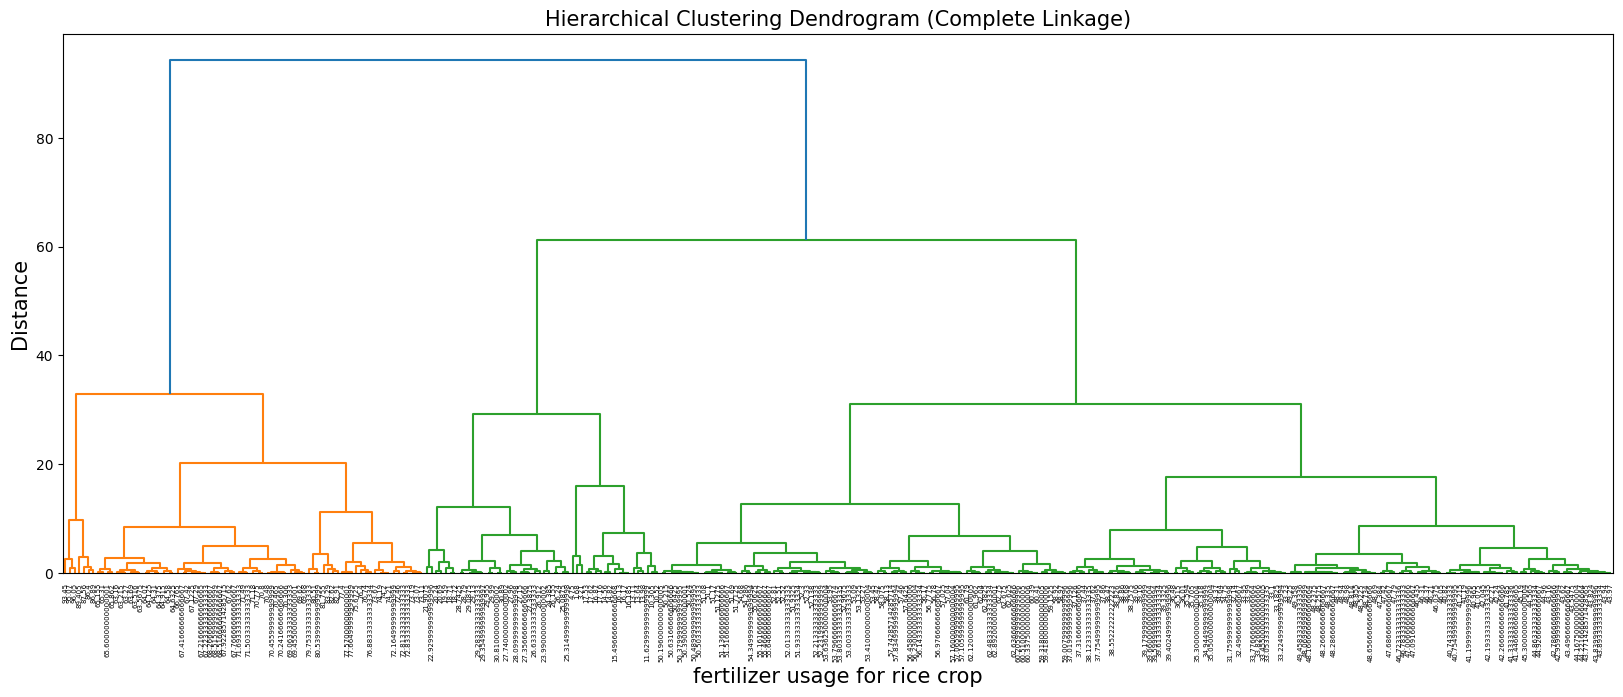

In [282]:
# Question 8: Hierarchical Clustering for Rice
# Don't forget to reshape the values with numpy

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', fontsize=15)
plt.xlabel('fertilizer usage for rice crop', fontsize=15)
plt.ylabel('Distance', fontsize=15)

# To make the plot easier to read, let's only keep the unique spending score values.
X_2 = np.reshape(np.unique(X_2_r), (-1, 1))

# Provide the linkage method we want and the chosen distance metric.
W_r = linkage(X_2, method='complete', metric='euclidean')
dendrogram(W_r, labels=X_2.reshape(-1)) # compute the dendogram according the linkage

plt.show()

## Exercise 4: Simple Linear Regression

A policymaker asks a simple question: "Does CO₂ have a measurable impact on crop yield for wheat and rice ?"
You decide to test this using a basic regression model.

Your mission:

*   Plot the heatmap of correlations for numeric columns only.
*   Model Crop_Yield as a function of CO2_Emissions (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`).
*   Use MinMaxScaler and find the $R^2$, the MSE and the MAE.






Text(0.5, 1.0, 'Heatmap of correlations between dataset numeric features')

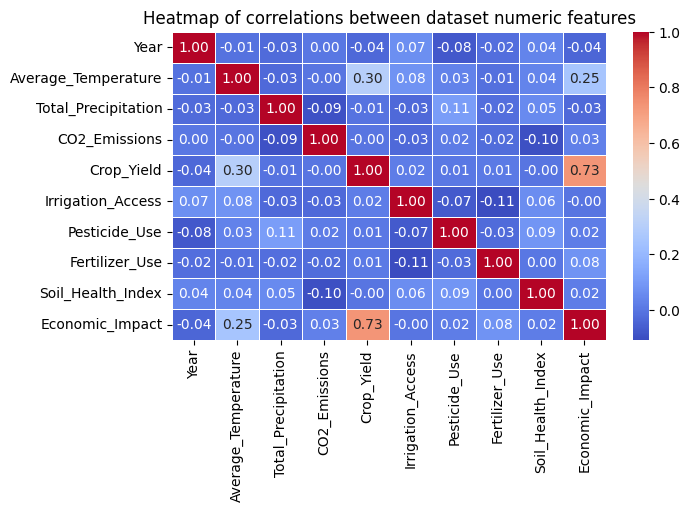

In [283]:
# Question 9: Plot heatmap of correlations

# Select only numeric columns
numeric_cols = data_climate.select_dtypes(include=["number"])
# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
fig=plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap of correlations between dataset numeric features')

In [284]:
# Seperate features and labels

X = data_climate[["CO2_Emissions"]]
y = data_climate["Crop_Yield"]
print("Features (X):\n", X.head())
print("Labels (y):\n", y.head())

Features (X):
    CO2_Emissions
0      14.126667
1      18.350000
2      15.115000
3      19.710000
4      20.786667
Labels (y):
 0    2.686333
1    2.686500
2    2.538000
3    2.794500
4    1.838667
Name: Crop_Yield, dtype: float64


In [285]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(465, 1), y_train=(465,)
Test set: X_test=(200, 1), y_test=(200,)


In [286]:
# Scale the data

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Apply scaling to training and testing sets
#Apply normalization to the training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("Scaled X_train:\n", X_train[:5])
print("Scaled X_test:\n", X_test[:5])


Scaled X_train:
 [[0.23216735]
 [0.69547325]
 [0.27512003]
 [0.75840192]
 [0.70696159]]
Scaled X_test:
 [[0.20816187]
 [0.23371056]
 [0.51337449]
 [0.51771834]
 [0.67043896]]


In [287]:
# Create linear regression model and fit into the training data

# Fit the regression model on the training data
model = LinearRegression(fit_intercept= True)

# Fit the model on the training data
model.fit(X_train, y_train)
# 3. Check the score/accuracy
print("R^2 Score of the model: ", round(model.score(X_test, y_test), 3))

R^2 Score of the model:  -0.008


In [288]:
# Question 10: Print out the R2, MSE and MAE score

# Model prediction from X_test
predictions = model.predict(X_test)
# Compare the MAE the MSE and the R^2
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MAE for the test set %.2f" % mae)
print("MSE for the test set %.2f" % mse)
print("R^2 for the test set %.2f" % r2)

MAE for the test set 0.55
MSE for the test set 0.48
R^2 for the test set -0.01


## Exercise 5: Multivariate Regression with Categorical Variables

Real-life relationships are rarely one-dimensional. You now create a new model to include all the other variables of the dataset, some of which are key climate factors.

Your mission:


*   Transform the column `Crop_Type` using `LabelEncoder`function and the column `Country` using `One-Hot` encoding
*   Build a multivariate regression model using all the variables to predict crop yield  (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`)
*   Compare its performance with the previous model of part 4



In [289]:
# Seperate features and labels, and transform the columns Crop_Type and Country (don't forget to delete the old columns)

# Define features (X) and target variable (y)
# We assign the variable Y to the Crop_Yield
y = data_climate[['Crop_Yield']]
# We create the dataframe X
X = data_climate.drop('Crop_Yield', axis = 1) # Features excluding target variable
X.head()

# label encoding
# We will use LabelEncoder
label_encoder = LabelEncoder()
# Applying the LabelEncoder to the 'Crop_Type' column
X['Crop_Type'] = label_encoder.fit_transform(X['Crop_Type'])
X.head()

# 1-hot encoding
# We create a DF with Dummy variables
dummies = pd.get_dummies(data_climate["Country"])
X = pd.concat([X, dummies], axis = 1) # We put together the X with the dummy columns we created
# We drop the Country column
X = X.drop(columns=["Country"])
# Have a look at what dummies actually looks like
print("Dummies:\n", dummies.head())
display(dummies)

# Display transformed dataset
print("Transformed Features:\n", X.head())
print("Target Labels:\n", y.head())

Dummies:
    Argentina  Australia  Brazil  Canada  China  France  India  Nigeria  \
0       True      False   False   False  False   False  False    False   
1       True      False   False   False  False   False  False    False   
2       True      False   False   False  False   False  False    False   
3       True      False   False   False  False   False  False    False   
4       True      False   False   False  False   False  False    False   

   Russia    USA  
0   False  False  
1   False  False  
2   False  False  
3   False  False  
4   False  False  


,Argentina,Australia,Brazil,Canada,China,France,India,Nigeria,Russia,USA
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
660,False,False,False,False,False,False,False,False,False,True
661,False,False,False,False,False,False,False,False,False,True
662,False,False,False,False,False,False,False,False,False,True
663,False,False,False,False,False,False,False,False,False,True


Transformed Features:
    Year  Crop_Type  Average_Temperature  Total_Precipitation  CO2_Emissions  \
0  1990          0              25.2500          1540.486667      14.126667   
1  1990          1              10.7550           867.305000      18.350000   
2  1991          0              14.3175           761.692500      15.115000   
3  1992          0              14.8650          1190.220000      19.710000   
4  1992          1              27.5200          1304.713333      20.786667   

   Irrigation_Access  Pesticide_Use  Fertilizer_Use  Soil_Health_Index  \
0          58.413333      42.223333       18.710000          72.513333   
1          39.830000      16.875000       75.195000          75.215000   
2          42.930000      29.302500       59.152500          59.955000   
3          57.740000      33.495000       54.680000          40.260000   
4          78.210000      30.903333       25.186667          53.616667   

   Economic_Impact  Argentina  Australia  Brazil  Canada 

In [290]:
# Split data into train and test sets, create linear regression model and fit into the training data

# Split data into train and test sets, create linear regression model and fit into the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)
# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_)
print("Features coefficients (weigths): ", model.coef_)# Get the coefficients, w

Intercept:  [3.14813861]
Features coefficients (weigths):  [[-9.99041259e-04 -9.27733203e-02  8.51678981e-03  2.63205273e-05
  -4.43682890e-03  1.66767234e-03 -1.15465314e-03 -9.10793760e-04
  -1.25570155e-03  1.67100019e-03  4.84856607e-03 -1.17495655e-02
   3.42075798e-02  4.39874933e-02  4.96661193e-02 -1.68498566e-01
   1.29778222e-01 -2.00205530e-02  1.08469188e-02 -7.30662143e-02]]


In [291]:
# Question 11: Print out the R2, MSE and MAE score

# Calculate Scores on Test-Set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("MAE LAB %.2f" % mae)
print("MSE LAB %.2f" % mse)
print("R^2 score LAB %.4f" % r2_test)

MAE LAB 0.38
MSE LAB 0.22
R^2 score LAB 0.5377


# Part 2: Association Rules - Turn movies ratings into bussiness insights!

Lights, Camera, Data!

Are you a movie fan? I bet you are! Have you ever wondered how streaming platforms like Netflix seem to know exactly which movie you'll love next? You might have heard that they use recommendation algorithms and wondered how they work.

In this assignment, you'll explore how **association rules** can be used to develop a simple recommendation algorithm. The idea is simple: by analyzing which movies are frequently watched together, we can uncover patterns and use these insights to suggest movies based on a user's viewing history.

Now, let's dive in and make it happen!

## Exercise 1: Data Processing

We will use a subset of MoviesLens dataset, which consists of user ratings for a list of movies and information about the movies themselves (i.e., title and genres).

First, you need to load the ratings data from the URL below, and try to print out the size of the dataset, the number of users who provided ratings, and the number of movies that have been rated.

URL = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

The `ratings` dataset contains four columns:

- `userID`: The ID of the user.
- `movieID`: The ID of the movie being rated.
- `rating`: The rating given by the user for the corresponding movie.
- `timestamp`: The timestamp when the rating was recorded.

In [292]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"
df_ratings = pd.read_csv(url)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [293]:
# Print the first 5 rows of the dataframe

df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [294]:
# Print the shape of the dataframe

print(f"The shape of the dataframe: {df_ratings.shape}")

The shape of the dataframe: (100836, 4)


In [295]:
# Print the number of ratings available

print(f"Total number of ratings available: {df_ratings.shape[0]}")


Total number of ratings available: 100836


In [296]:
# Print the number of users who provided ratings

num_users=df_ratings['userId'].nunique()
print(f"Nomber of users who provided ratingss: {num_users}")


Nomber of users who provided ratingss: 610


In [297]:
# Print the number of movies have been rated

num_movies=df_ratings['movieId'].nunique()
print(f"Nomber of movies have been rated: {num_movies}")


Nomber of movies have been rated: 9724


[texte du lien](https://)Now, we need to transform the dataset into a matrix of size `n_users` × `n_movies`, where each row represents a user's ratings for all movies. If a user has not rated a movie, the rating will be 0.

To create this matrix, we will use the `pivot` function from pandas.

In [298]:
df_ratings_pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating')
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see that there are a lot of NaN values because each user rates only a subset of movies (those they have watched). We need to fill these NaN values with 0s.

In [299]:
# Replace NaN values with 0
df_ratings_pivot.fillna(0, inplace=True)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we don’t just want to identify movies that are frequently watched together—we want to focus on the ones that people actually enjoy. To do this, we'll consider a rating of 3 or higher as an indicator that a viewer liked the movie.

Therefore, we need to map ratings ≥ 3 to `True` (liked) and ratings below 3 to `False` (not liked).

In [300]:
df_ratings_pivot = df_ratings_pivot.map(lambda x: True if x >= 3 else False)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, we are ready to apply the association rules!!

## Exercise 2: Association Rules



We will apply the **Apriori algorithm** to identify interesting association rules.

First, we need to find the frequent itemsets using the following configurations:

`min_support = 0.1`
`max_len = 2`

In [301]:
# Find the frequent itemsets

freq_items = apriori(df_ratings_pivot, min_support=0.1, max_len=2, use_colnames=True)
freq_items.head(10)


,support,itemsets
0,0.326230,(1)
1,0.145902,(2)
2,0.162295,(6)
3,0.193443,(10)
4,0.122951,(16)
5,0.100000,(17)
6,0.126230,(21)
7,0.103279,(25)
8,0.280328,(32)
9,0.170492,(34)


In [302]:
# Question 12: Find the number of itemsets

print(f"Nomber of itemsets: {freq_items.shape[0]}")


Nomber of itemsets: 2929


Now, we will mine the association rules from the frequent itemsets found above using `metric='lift'` and `min_threshold=1`.

In [303]:
# Find association rules

rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules.sort_values(by="lift", ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(32),(1),0.280328,0.326230,0.150820,0.538012,1.649182,1.0,0.059368,1.458415,0.546969,0.330935,0.314324,0.500162
1,(1),(32),0.326230,0.280328,0.150820,0.462312,1.649182,1.0,0.059368,1.338456,0.584233,0.330935,0.252870,0.500162
2,(1),(34),0.326230,0.170492,0.111475,0.341709,2.004252,1.0,0.055856,1.260093,0.743667,0.289362,0.206408,0.497777
3,(34),(1),0.170492,0.326230,0.111475,0.653846,2.004252,1.0,0.055856,1.946448,0.604046,0.289362,0.486244,0.497777
4,(1),(47),0.326230,0.313115,0.132787,0.407035,1.299955,1.0,0.030640,1.158391,0.342465,0.262136,0.136734,0.415559
5,(47),(1),0.313115,0.326230,0.132787,0.424084,1.299955,1.0,0.030640,1.169911,0.335926,0.262136,0.145234,0.415559
6,(1),(50),0.326230,0.322951,0.140984,0.432161,1.338163,1.0,0.035628,1.192326,0.375064,0.277419,0.161303,0.434355
7,(50),(1),0.322951,0.326230,0.140984,0.436548,1.338163,1.0,0.035628,1.195791,0.373247,0.277419,0.163733,0.434355
8,(1),(110),0.326230,0.357377,0.163934,0.502513,1.406113,1.0,0.047347,1.291737,0.428662,0.315457,0.225849,0.480614
9,(110),(1),0.357377,0.326230,0.163934,0.458716,1.406113,1.0,0.047347,1.244762,0.449439,0.315457,0.196634,0.480614


Now, let's map the movie IDs with their titles so we can identify them.

First, let's load the `movies` dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv"

You will see that the `movies` dataset has 3 columns:
- `movieID`: The ID of the movie.
- `title`: The title of the movie.
- `genres`: The genres of the movie.

In [304]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv"
df_movies = pd.read_csv(url)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In the following cell, we provide the code to map movie IDs with their titles. We assume that you are using the variable `rules` to store the association rules. If you used a different variable name, please update the code accordingly.

In [305]:
def get_movie_name(movie_id):
    return df_movies[df_movies['movieId'] == movie_id]['title'].values[0]

In [306]:
# Map antecedents and consequents with movie names
rules['antecedents'] = rules['antecedents'].apply(lambda x: get_movie_name(list(x)[0]))
rules['consequents'] = rules['consequents'].apply(lambda x: get_movie_name(list(x)[0]))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Toy Story (1995),0.280328,0.326230,0.150820,0.538012,1.649182,1.0,0.059368,1.458415,0.546969,0.330935,0.314324,0.500162
1,Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.326230,0.280328,0.150820,0.462312,1.649182,1.0,0.059368,1.338456,0.584233,0.330935,0.252870,0.500162
2,Toy Story (1995),Babe (1995),0.326230,0.170492,0.111475,0.341709,2.004252,1.0,0.055856,1.260093,0.743667,0.289362,0.206408,0.497777
3,Babe (1995),Toy Story (1995),0.170492,0.326230,0.111475,0.653846,2.004252,1.0,0.055856,1.946448,0.604046,0.289362,0.486244,0.497777
4,Toy Story (1995),Seven (a.k.a. Se7en) (1995),0.326230,0.313115,0.132787,0.407035,1.299955,1.0,0.030640,1.158391,0.342465,0.262136,0.136734,0.415559


Now, we are ready to find out the most interesting association rules (i.e a pair of movies that are watched together) in term of the `lift` metric

In [307]:
# Question 13: Find the most interesting rule

# Select only the lift > 1, to see 'stronghest' association rules
rules[rules["lift"] > 1].sort_values(by="lift", ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Toy Story (1995),0.280328,0.326230,0.150820,0.538012,1.649182,1.0,0.059368,1.458415,0.546969,0.330935,0.314324,0.500162
1,Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.326230,0.280328,0.150820,0.462312,1.649182,1.0,0.059368,1.338456,0.584233,0.330935,0.252870,0.500162
2,Toy Story (1995),Babe (1995),0.326230,0.170492,0.111475,0.341709,2.004252,1.0,0.055856,1.260093,0.743667,0.289362,0.206408,0.497777
3,Babe (1995),Toy Story (1995),0.170492,0.326230,0.111475,0.653846,2.004252,1.0,0.055856,1.946448,0.604046,0.289362,0.486244,0.497777
4,Toy Story (1995),Seven (a.k.a. Se7en) (1995),0.326230,0.313115,0.132787,0.407035,1.299955,1.0,0.030640,1.158391,0.342465,0.262136,0.136734,0.415559


In [308]:
# Question 14: Find the movie that is the most frequently watched together with "Beauty and the beast (1991)"

# Filter association rules where 'Beauty and the Beast (1991)' is the antecedent
beauty_rules = rules[rules["antecedents"].apply(lambda x: "Beauty and the Beast (1991)" in x)]
# Sort by 'lift' to find the strongest association
most_watched_together = beauty_rules.sort_values(by="lift", ascending=False)

# Display the top result
print("Most frequently watched movie together with 'Beauty and the Beast (1991)':")
print(most_watched_together.head(1))  # Shows the strongest association

Most frequently watched movie together with 'Beauty and the Beast (1991)':
                      antecedents     consequents  antecedent support  \
2678  Beauty and the Beast (1991)  Aladdin (1992)             0.22459   

      consequent support   support  confidence      lift  representativity  \
2678            0.277049  0.185246    0.824818  2.977152               1.0   

      leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
2678  0.123023    4.126844       0.856461  0.585492   0.757684    0.746728  


# Part 3: Binary Classification

You are working at a leading Tour & Travel Company, and there’s trouble on the horizon — some customers are slipping away, never to book again! Your job is to predict which customers are at risk of churning and help the company keep them engaged.

Using historical customer data, you’ll use binary classification algorithms to identify potential churners before they disappear.

First, you need to load the dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"

The dataset consists of following columns:
- `Age`: Age of customer.
- `FrequentFlyer`: Whether the customer takes frequent flights.
- `AnnualIncomeClass`: Class of the customer's annual income.
- `ServicesOpted`: Number of times services opted during recent years.
- `AccountSyncedToSocialMedia`: Whether company account of the user is synchronised to their social media.
- `BookedHotelOrNot`: Whether the customer books hotels using company services.
- `Target`: Whether the customer is a churner (1 for yes, 0 for no).

Try to print out the number of samples available in the dataset and types of each columns.

In [309]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"
df_travel = pd.read_csv(url)


In [310]:
# Print the first 5 rows

df_travel.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,36,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [311]:
# Print the number of samples in the dataset

print(f"Total number of samples: {df_travel.shape[0]}")


Total number of samples: 960


In [312]:
# Print the column types

print("\nColumn Data Types:")
df_travel.dtypes


Column Data Types:


,0
Age,int64
FrequentFlyer,object
AnnualIncomeClass,object
ServicesOpted,int64
AccountSyncedToSocialMedia,object
BookedHotelOrNot,object
Target,int64


## Exercise 1: Preprocess


First, we want to convert the columns with an object data type to
a **categorical** one and visualize the correlation heatmap of the dataset's features.

In [313]:
for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

Text(0.5, 1.0, 'Heatmap of correlations between dataset categorical features')

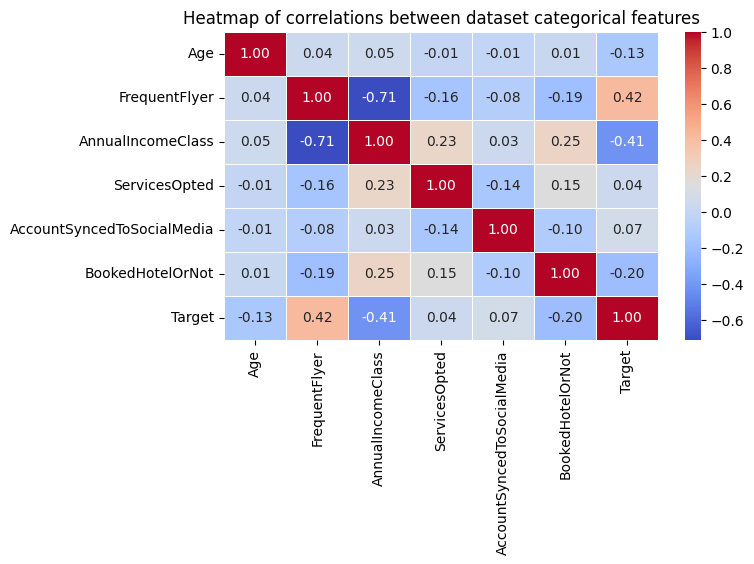

In [314]:
# Question 15: Plot heatmap of correlations

numeric_cols = df_travel.select_dtypes(include=["number"])
corr_matrix = df_travel.corr()
# Plot heatmap
fig=plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap of correlations between dataset categorical features')

Now, let's separate the dataset into features (X) and labels (y). Then, split the data into train and test sets using `train_test_split` function from Sklearn with `test_size=0.2`, `random_state=42`, and set `stratify=y` to preserve the label distribution in both sets.

In [315]:
# Seperate the dataset into features and labels

# Define features (X) and target variable (y) for df_travel
X = df_travel.drop(columns=["Target"])  # Features excluding the target variable
y = df_travel["Target"]  # Target variable (churn status)

# Display transformed dataset
print("Features (X):\n", X.head())
print("Labels (y):\n", y.head())

Features (X):
    Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0   36              0                  2              6   
1   34              2                  1              5   
2   37              0                  2              3   
3   30              0                  2              2   
4   30              0                  1              1   

   AccountSyncedToSocialMedia  BookedHotelOrNot  
0                           0                 1  
1                           1                 0  
2                           1                 0  
3                           0                 0  
4                           0                 0  
Labels (y):
 0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64


In [316]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Display dataset shapes
print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set: X_test={X_test.shape}, y_test={y_test.shape}")

Training set: X_train=(768, 6), y_train=(768,)
Test set: X_test=(192, 6), y_test=(192,)


Before building any model, it's useful to establish a simple reference point. Imagine predicting the most frequent class for every single observation—no learning, just repetition. The accuracy you'd get from that naive approach is called the baseline accuracy. It’s the minimum benchmark any meaningful model should aim to outperform.

In [317]:
# Question 16: Calculate baseline accuracy

# Trouver la classe la plus fréquente dans les données
#most_frequent_class = Counter(y_train).most_common(1)[0][0]
most_frequent_class = y_train.value_counts().idxmax()

# Calculer la baseline accuracy
baseline_accuracy = sum(y_train == most_frequent_class) / len(y_train)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.7656


Now, let's standardize the features using `StandardScaler` from Sklearn.

In [318]:
# Standardise features

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

StandardScaler()

## Exercise 2: Logistic regression

First, try use logistic regression for use our data. Use LogisticRegression with the following setting:
`penalty='l2', solver='lbfgs', max_iter=1000, random_state=30`

In [319]:
# Logistic Regression

#Apply normalization to the training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the regression model on the training data
model = LogisticRegressionCV(
    solver='lbfgs',  # Solver method
    penalty='l2',     #
    max_iter=1000,    # Maximum iterations for convergence
    random_state=30  # Fixing seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=1000, random_state=30)

In [320]:
# Question 17: Find the test accuracy

# Test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8542


Next, train a logistic regression classifier with cross-validation. Use 5 folds and 9 values in the logscale between $10^{-4}$ and $10^4$ for the regularizer parameter. For the rest of the arguments, we use the same values as we used for the logistic regression with no cross validation.

__Important:__ Set the following values for the arguments:
`
penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=4, Cs=*9*
`

In [321]:
# Train a logistic regression classifier with cross-validation

# Fit the regression model on the training data
model = LogisticRegressionCV(
    solver='lbfgs',  # Solver method
    penalty='l2',     # L2 Regularization
    max_iter=1000,    # Maximum iterations for convergence
    random_state=42,  # Fixing seed for reproducibility
    cv=4,             # Number of cross-validation folds
    Cs=np.logspace(-4, 4, 9)  # Regularization parameter values
)

# Fit the model on the training data
model.fit(X_train, y_train)
print("Logistic regression model trained successfully with cross-validation!")

Logistic regression model trained successfully with cross-validation!


In [322]:
# Question 18: Find the value of the regularization parameter and the test accuracy

# Find the best regularization parameter
best_C = model.C_[0]  # The optimal value chosen from the logscale
# Test accuracy
test_accuracy = model.score(X_test, y_test)
print(f"Optimal Regularization Parameter (C): {best_C:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Optimal Regularization Parameter (C): 1.0000
Test Accuracy: 0.8542


## Exercise 3: KNN classifier

Use the KNeighborClassifier from sklearn using the following setting:
`n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree"`

In [323]:
# KNeighborClassifier

# TODO: Your code here

Use `GridSearchCV` to find the best hyper-parameters for your KNN model. Use values between 1 and 10 for `n_neighbors` argument and use either 'uniform' or 'distance' for the `weights` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]}, cv=5
```

In [324]:
# Question 19: Find the accuracy of the best KNN model

# TODO: Your code here

In [325]:
# Question 20: Find the 'n_neighbors' and 'weights' values for the best KNN model

# TODO: Your code here

## Exercise 4: Decision Tree

Train a Decision Tree classifier on the training data. Use the following values for the arguments of the decision tree:
```
criterion="gini", max_depth=3, random_state=30
```

In [326]:
# Decision Tree

# TODO: Your code here

Use `GridSearchCV` to find the best hyper-parameters for your decision tree model. Use values between 1 and 7 for `max_depth` argument and use either 'gini' or 'entropy' for the `criterion` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]}, cv=5
```

In [327]:
# Question 21: Find the accuracy of the best decision tree model

# TODO: Your code here

In [328]:
# Question 22: Find the 'criterion' and 'max_depth' values for the best decision tree model

# TODO: Your code here

The company places a strong emphasis on keeping its customers and has solid resources dedicated to retention. In such a case, choosing the right evaluation metric becomes crucial. The answer lies in understanding what matters most in this context.


Question 23: Find the best metric for the company

> TODO: Your answer here

In [329]:
# Question 24: Find the model that gives the best result using the metric above

# TODO: Your code here